In [ ]:
**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features
        (variables) from a dataset to improve a machine learning model's 
        performance and efficiency. Instead of using all the features, we 
        select only the most relevant ones that contribute significantly 
        to predictions.

In [ ]:
**Why Do We Need Feature Selection?**
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.

In [ ]:
**Types of Feature Selection Methods**
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.

In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import Lasso 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [8]:
#Step 1: Create a Sample Dataset 
np.random.seed(42) 
data=pd.DataFrame({ 
    'Size': np.random.randint(1000, 5000, 100), # Square feet 
    'Bedrooms': np.random.randint(1, 5, 100), # Number of bedrooms 
    'Age': np.random.randint(1, 50, 100), #Age of the house 
    'Price': np.random.randint(100000, 500000, 100) # House price 
})

In [10]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


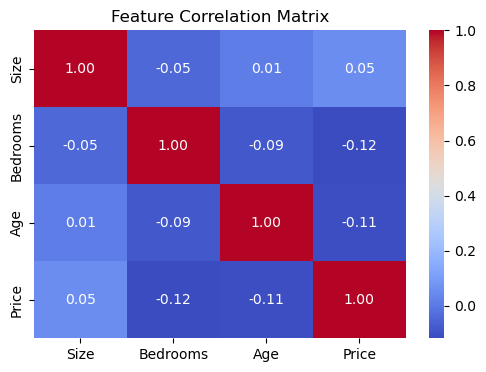

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()
#compute correlation to see how the features relate to the target.

In [12]:
#Step 3: Apply Recursive Feature Elimination (Wrapper Method) 
X= data.drop(columns=['Price']) # Features 
y= data['Price'] # Target variable 
model=RandomForestRegressor() 
rfe=RFE(model, n_features_to_select=2) # Select top 2 features 
X_selected=rfe.fit_transform(X, y) 
print("Selected Features using RFE:", X.columns[rfe.support_]) 


Selected Features using RFE: Index(['Size', 'Age'], dtype='object')


In [15]:
#Step 4: Apply Lasso (Least Absolute Shrinkage and Selection Operator) Regression (Embedded Method) 
lasso=Lasso(alpha=0.1) 
lasso.fit(X, y) 
importance=np.abs(lasso.coef_) 
# Display Feature Importance 
selected_features=X.columns [importance > 0] 
print("Selected Features using Lasso:", selected_features)
#Apply Lasso Regression (Embedded Method) to eliminate irrelevant features. 

Selected Features using Lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')


In [26]:
#Extract Date & Time Features 
import pandas as pd 
#Sample dataset 
df = pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:38:00', '2025-02-06 18:45:00'])}) 
# Extract date-related features 
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek   #Monday, Sunday=6 
df ['Hour']=df['TransactionDate'].dt.hour #Extract hour 
df ['IsWeekend']=df['DayOfWeek'].apply(lambda x: 1 if x==5 else 0) #Weekend flag 
print(df) 
#iwhy? Helps capture behavioral trends (e.g., shopping habits on weekends vs. weekdays).

      TransactionDate  DayOfWeek  Hour  IsWeekend
0 2025-02-05 14:38:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [29]:
#Aggregated Features 
#Find average transaction amount per user: 
df_transactions =pd.DataFrame({ 
    'UserID': [101, 102, 101, 103, 102], 
    'TransactionAmount': [500, 300, 700, 1000, 400] 
})
df_user_avg =df_transactions.groupby('UserID') ['TransactionAmount'].mean().reset_index() 
df_user_avg.rename(columns={'TransactionAmount': 'AvgTransactionAmount'}, inplace=True) 
print(df_user_avg) 
#why? Identifies high-value customers and spending patterns.

   UserID  AvgTransactionAmount
0     101                 600.0
1     102                 350.0
2     103                1000.0


In [35]:
#Encoding Categorical Variables 
#Convert Product Category (Electronics, Clothing) into numerical form: 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.DataFrame({'ProductCategory': ["Electronics", "Clothing", "Clothing", "Grocery"]})
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['ProductCategory']])
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ProductCategory']))
print(df_encoded)

#Why? Converts non-numeric categories into a format suitable for ML models.

   ProductCategory_Clothing  ProductCategory_Electronics  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          0.0   

   ProductCategory_Grocery  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [ ]:
**What is Feature Engineering?**
 
    Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. It involves techniques like feature extraction, transformation, encoding, and scaling to make data more useful for predictions.
 
**Why Do We Need Feature Engineering?**
 
1.**Improves Model Performance** – Good features help models make better predictions.
 
2.**Reduces Overfitting** – Helps eliminate noise and irrelevant data.
 
3.**Handles Missing Data** – Creates meaningful replacements for missing values.
 
4.**Enables Better Interpretability** – Makes features more understandable and useful.

5.**Reduces Dimensionality** – Helps remove unnecessary data points, making the model efficient.
 

In [45]:
#Log Transformation for Skewed Data 
#If TransactionAmount has outliers, apply log transformation: 
import numpy as np
import pandas as pd
df = pd.DataFrame({'TransactionAmount': [100, 200, 5000, 10000, 20000]})
df['LogTransactionAmount'] = np.log1p(df['TransactionAmount'])
print(df)

#Why? Reduces shewness and impact of outliers.

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2               5000              8.517393
3              10000              9.210440
4              20000              9.903538


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
df = pd.DataFrame({'TransactionAmount': [100, 200, 300, 400, 500]})
scaler = MinMaxScaler()
df['Normalized TransactionAmount'] = scaler.fit_transform(df[['TransactionAmount']])
standard_scaler = StandardScaler()
df['Standardized TransactionAmount'] = standard_scaler.fit_transform(df[['TransactionAmount']])
print(df)

#Why? Ensures all features have the same scale, preventing bias in ML models.

   TransactionAmount  Normalized TransactionAmount  \
0                100                          0.00   
1                200                          0.25   
2                300                          0.50   
3                400                          0.75   
4                500                          1.00   

   Standardized TransactionAmount  
0                       -1.414214  
1                       -0.707107  
2                        0.000000  
3                        0.707107  
4                        1.414214  


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [58]:
file_path=("C:\\Users\\CVR\\Downloads\\flight_price(Sheet1).csv")
df=pd.read_csv(file_path)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
**Insights from "flight_price.xlsx"**
**Dataset Overview**
 
Total Rows: 10,683
 
Total Columns: 11
 
Data Types:
 
10 categorical (object) columns
 
1 numerical (integer) column (Price)
 
### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.
**Column Breakdown:**   Airline – Name of t... by Shaik Suhel
Shaik Suhel
3:03 pm
**Column Breakdown:**
 
Airline – Name of the airline (e.g., IndiGo, Air India, Jet Airways)
 
Date_of_Journey – The flight's departure date
 
Source – Flight departure location
 
Destination – Flight arrival location
 
Route – Flight path (e.g., BLR → DEL)
 
Dep_Time – Flight departure time
 
Arrival_Time – Flight arrival time
 
Duration – Total travel duration (e.g., "2h 50m")
 
Total_Stops – Number of stops (e.g., "non-stop", "1 stop", "2 stops")
 
Additional_Info – Extra details (e.g., "No info")
 
Price – Flight ticket price (numeric)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [62]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [63]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [65]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [67]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [68]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [69]:
df['Arrival_Time']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]


In [70]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01,2h 50m,non-stop,No info,3897,24,3,2019,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13,7h 25m,2 stops,No info,7662,1,5,2019,NaN


In [72]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]


In [73]:
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Additional_Info  10683 non-null  object 
 9   Price            10683 non-null  int64  
 10  Date             10683 non-null  int32  
 11  Month            10683 non-null  int32  
 12  Year             10683 non-null  int32  
 13  Arrival_min      0 non-null      float64
 14  Departure_hour   10683 non-null  int32  
 15  Departure_min    10683 non-null  int32  
dtypes: float64(1), int32(5), int64(1), object(9)
memory usage:

In [75]:
df.drop('Dep_Time',axis=1,inplace=True)

In [76]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01,2h 50m,non-stop,No info,3897,24,3,2019,NaN,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13,7h 25m,2 stops,No info,7662,1,5,2019,NaN,5,50


In [77]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [78]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,09,23h 40m,NaN,No info,7480,6,5,2019,NaN,9,45


In [79]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [80]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [81]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [82]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min


In [83]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01,2h 50m,0,No info,3897,24,3,2019,NaN,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13,7h 25m,2,No info,7662,1,5,2019,NaN,5,50


In [84]:
df.drop('Route',axis=1,inplace=True)

In [85]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,01,2h 50m,0,No info,3897,24,3,2019,NaN,22,20
1,Air India,Kolkata,Banglore,13,7h 25m,2,No info,7662,1,5,2019,NaN,5,50


In [86]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [87]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [88]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [89]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
encoder=OneHotEncoder()

In [92]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [93]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to prevent dummy variable trap

# Select categorical columns to encode
categorical_cols = ['Airline', 'Source', 'Destination']

# Encode the categorical columns
encoded_cols = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)  # Get meaningful column names
)

# Reset the index to match df
encoded_cols.index = df.index  

# Drop original categorical columns
df.drop(columns=categorical_cols, inplace=True)

# Concatenate the encoded features with the original dataframe
df = pd.concat([df, encoded_cols], axis=1)

# Display the updated dataset
print(df.head())

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [95]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,01,2h 50m,0,No info,3897,24,3,2019,NaN,22,20
1,Air India,Kolkata,Banglore,13,7h 25m,2,No info,7662,1,5,2019,NaN,5,50
2,Jet Airways,Delhi,Cochin,04,19h,2,No info,13882,9,6,2019,NaN,9,25
3,IndiGo,Kolkata,Banglore,23,5h 25m,1,No info,6218,12,5,2019,NaN,18,5
4,IndiGo,Banglore,New Delhi,21,4h 45m,1,No info,13302,1,3,2019,NaN,16,50


In [96]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [97]:
# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids redundancy

# Encode "Additional_Info"
encoded_additional_info = pd.DataFrame(
    encoder.fit_transform(df[['Additional_Info']]),  # Fit & transform
    columns=encoder.get_feature_names_out(['Additional_Info'])  # Generate column names
)

# Reset index to match df
encoded_additional_info.index = df.index  

# Drop the original "Additional_Info" column
df.drop(columns=['Additional_Info'], inplace=True)

# Concatenate the encoded features with the original dataframe
df = pd.concat([df, encoded_additional_info], axis=1)

# Display the updated dataset
print(df.head())

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [98]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,01,2h 50m,0,No info,3897,24,3,2019,NaN,22,20
1,Air India,Kolkata,Banglore,13,7h 25m,2,No info,7662,1,5,2019,NaN,5,50
2,Jet Airways,Delhi,Cochin,04,19h,2,No info,13882,9,6,2019,NaN,9,25
3,IndiGo,Kolkata,Banglore,23,5h 25m,1,No info,6218,12,5,2019,NaN,18,5
4,IndiGo,Banglore,New Delhi,21,4h 45m,1,No info,13302,1,3,2019,NaN,16,50


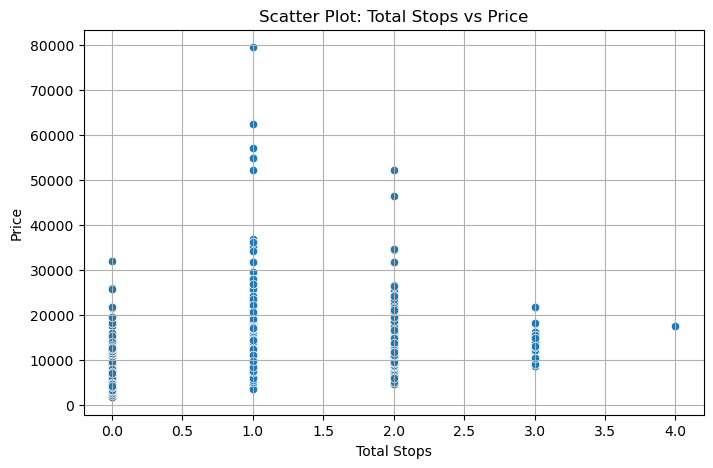

In [99]:
# Scatter Plot: Total_Stops vs Price (or another numeric column)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total_Stops'], y=df['Price'])  # Replace 'Price' with the target variable
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Scatter Plot: Total Stops vs Price")
plt.grid(True)
plt.show()